In [1]:
import numpy as np
import pandas as pd
import re
import math
from matplotlib import pyplot as plt

In [2]:
import glob

In [3]:
#SITES
#1=RU
#2=SI
#3=CBIC

#NDARAE270LEZ
#NDARAA306NT2 they are labelled as 3 but it says RU??? they must have done imaging at RU but psych at CBIC?

In [2]:

dx = pd.read_csv('/nese/mit/group/sig/projects/hbn/phenotype/Clinical_Measures/Clinical_Diagnosis_Demographics.csv')
dx = dx[['Identifiers', 'Age', 'Sex', 'Site', 'DX_01', 'DX_02', 'DX_03', 'DX_04', 'DX_05', 'DX_06', 'DX_07', 'DX_08', 'DX_09', 'DX_10']]


/tmp/ipykernel_10741/1566004162.py:3: DtypeWarning: Columns (137,152) have mixed types. Specify dtype option on import or set low_memory=False.
  dx = pd.read_csv('/nese/mit/group/sig/projects/hbn/phenotype/Clinical_Measures/Clinical_Diagnosis_Demographics.csv')


In [3]:
sub_list = dx.Identifiers.tolist()

In [6]:
all_dx = []
for i,column in enumerate(dx):
    print(column)
    if i<=3:
        print('skipping')
        continue
    all_dx.append(dx[column].tolist())
all_dx = [item for sublist in all_dx for item in sublist]
all_dx = np.unique(np.array(all_dx))
all_dx = all_dx[0:-1]
all_dx = all_dx.tolist()
all_dx[0:10]

Identifiers
skipping
Age
skipping
Sex
skipping
Site
skipping
DX_01
DX_02
DX_03
DX_04
DX_05
DX_06
DX_07
DX_08
DX_09
DX_10


['ADHD-Combined Type',
 'ADHD-Hyperactive/Impulsive Type',
 'ADHD-Inattentive Type',
 'Acute Stress Disorder',
 'Adjustment Disorders',
 'Agoraphobia',
 'Alcohol Use Disorder',
 'Anorexia Nervosa-Binge Eating/Purging Type',
 'Anorexia Nervosa-Restricting Type',
 'Autism Spectrum Disorder']

In [7]:
#subject by dx array
dx_array = np.zeros( (dx.shape[0],len(all_dx) ))

#LOOP THROUGH columns
for i,column in enumerate(dx):
    print(column)
    if i<=3:
        print('skipping')
        continue
    for ii,d in enumerate(dx[column]):
        #print(i,ii,d)
        if not isinstance(d, str):
            if math.isnan(d):
                continue
        if not bool(re.match(d,' ')):
            dx_array[ii,all_dx.index(d)]=1

Identifiers
skipping
Age
skipping
Sex
skipping
Site
skipping
DX_01
DX_02
DX_03
DX_04
DX_05
DX_06
DX_07
DX_08
DX_09
DX_10


In [66]:
dx_array.shape

(4767, 110)

In [8]:
np.save('../data/phenotype/dx_list.npy',all_dx)
np.save('../data/phenotype/sub_list.npy',sub_list)
np.save('../data/phenotype/dx_onehot.npy',dx_array)

In [9]:
dx_df = pd.DataFrame(dx_array)
dx_df.columns = all_dx
dx_df
dx_df.to_pickle('../data/phenotype/dx_onehot_df.pkl')
#unpickled_df = pd.read_pickle("./dummy.pkl")

In [10]:
dx_final = dx[['Identifiers', 'Age', 'Sex', 'Site']]
df2 = pd.DataFrame(dx_array.tolist(), columns=all_dx)
dx_final = pd.concat([dx_final, df2], axis=1)

dx_final.to_csv('../data/phenotype/dx_onehot.csv', index=False)


In [4]:
dx_final=pd.read_csv('../data/phenotype/dx_onehot.csv')

In [10]:
dx_final['Sex'].value_counts()['female']

1733

In [8]:
dx_final['Autism Spectrum Disorder'].sum()

659.0

In [33]:

dx_final['No Diagnosis Given'].sum()

373.0

In [19]:
for col in dx_final.columns:
    print(col)

Identifiers
Age
Sex
Site
ADHD-Combined Type
ADHD-Hyperactive/Impulsive Type
ADHD-Inattentive Type
Acute Stress Disorder
Adjustment Disorders
Agoraphobia
Alcohol Use Disorder
Anorexia Nervosa-Binge Eating/Purging Type
Anorexia Nervosa-Restricting Type
Autism Spectrum Disorder
Avoidant/Restrictive Food Intake Disorder
Binge-Eating Disorder
Bipolar I Disorder
Bipolar II Disorder
Body Dysmorphic Disorder
Borderline Intellectual Functioning
Borderline Personality Disorder
Bulimia Nervosa
Cannabis Use Disorder
Child Neglect, Suspected
Child Onset Fluency Disorder (Stuttering)
Conduct Disorder-Adolescent-onset type
Conduct Disorder-Childhood-onset type
Conduct Disorder-Unspecified onset
Conversion Disorder
Cyclothymic Disorder
Delirium due to another medical condition
Delirium due to multiple etiologies
Depressive Disorder Due to Another Medical Condition
Developmental Coordination Disorder
Disinhibited Social Engagement Disorder
Disruptive Mood Dysregulation Disorder
Encopresis
Enuresis
Exco

In [ ]:
Social (Pragmatic) Communication Disorder
Language Disorder

In [29]:
columns = ['Specific Learning Disorder with Impairment in Mathematics',
'Specific Learning Disorder with Impairment in Mathematics',
'Specific Learning Disorder with Impairment in Reading',
'Specific Learning Disorder with Impairment in Reading',
'Specific Learning Disorder with Impairment in Written Expression']
num_rows = (dx_final[columns] == 1).any(axis=1).sum()
num_rows

1080

In [30]:
columns=['Generalized Anxiety Disorder',
'Unspecified Anxiety Disorder',
'Social Anxiety (Social Phobia)',
'Other Specified Anxiety Disorder',
'Separation Anxiety',
'Illness Anxiety Disorder']
num_rows = (dx_final[columns] == 1).any(axis=1).sum()
num_rows

1364

In [31]:
columns = ['Unspecified Attention-Deficit/Hyperactivity Disorder', 'ADHD-Combined Type', 'ADHD-Hyperactive/Impulsive Type', 'ADHD-Inattentive Type']
num_rows = (dx_final[columns] == 1).any(axis=1).sum()
num_rows

2486

In [32]:
1733/4767

0.3635410111181036

## demographic plots

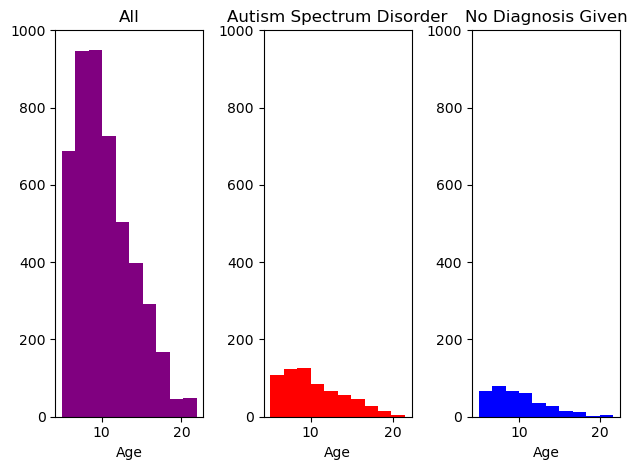

In [13]:
# create a figure with three subplots
fig, axs = plt.subplots(1, 3)

# plot the first subplot with age column for the entire dataframe
#.plot(df['Age'])
axs[0].hist(dx_final['Age'], bins=10, color='purple')
axs[0].set_title('All')
axs[0].set_ylim([0, 1000])
axs[0].set_xlabel('Age')

# plot the second subplot with age column for rows where Autism Spectrum Disorder is equal to 1
axs[1].hist(dx_final[dx_final['Autism Spectrum Disorder'] == 1]['Age'], bins=10, color='red')
axs[1].set_title('Autism Spectrum Disorder')
axs[1].set_ylim([0, 1000])
axs[1].set_xlabel('Age')

# plot the third subplot with age column for rows where No Diagnosis Given is equal to 1
axs[2].hist(dx_final[dx_final['No Diagnosis Given'] == 1]['Age'], bins=10, color='blue')
axs[2].set_title('No Diagnosis Given')
axs[2].set_ylim([0, 1000])
axs[2].set_xlabel('Age')

# adjust the layout of subplots
plt.tight_layout()

# show the plot
plt.show()

In [ ]:
# create a figure with three subplots
fig, axs = plt.subplots(1, 3)

# plot the first subplot with age column for the entire dataframe
#.plot(df['Age'])
axs[0].hist(dx_final['Age'], bins=10, color='purple')
axs[0].set_title('All')
axs[0].set_ylim([0, 1000])
axs[0].set_xlabel('Age')

# plot the second subplot with age column for rows where Autism Spectrum Disorder is equal to 1
axs[1].hist(dx_final[dx_final['Autism Spectrum Disorder'] == 1]['Age'], bins=10, color='red')
axs[1].set_title('Autism Spectrum Disorder')
axs[1].set_ylim([0, 1000])
axs[1].set_xlabel('Age')

# plot the third subplot with age column for rows where No Diagnosis Given is equal to 1
axs[2].hist(dx_final[dx_final['No Diagnosis Given'] == 1]['Age'], bins=10, color='blue')
axs[2].set_title('No Diagnosis Given')
axs[2].set_ylim([0, 1000])
axs[2].set_xlabel('Age')

# adjust the layout of subplots
plt.tight_layout()

# show the plot
plt.show()

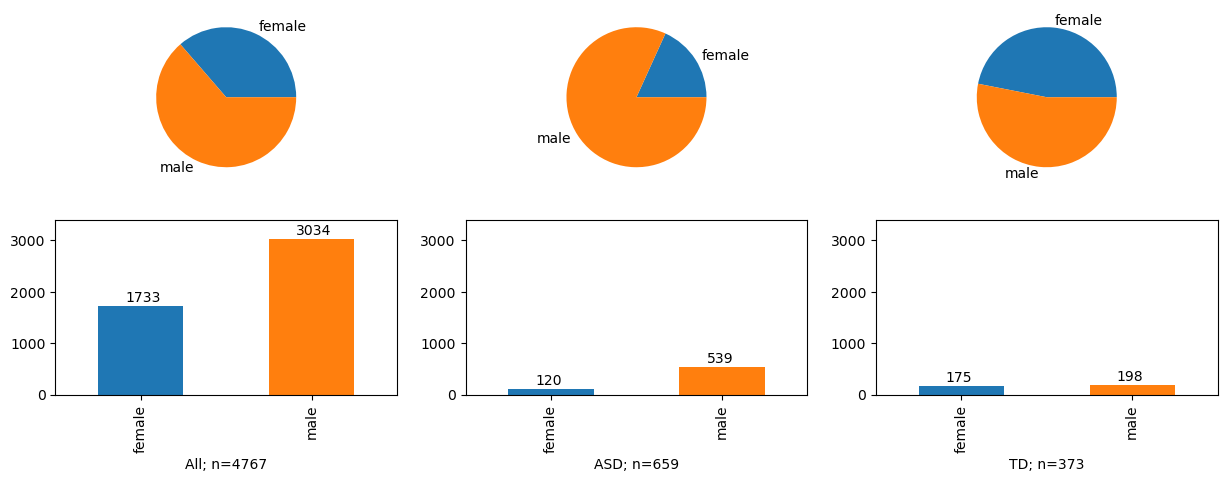

In [170]:

fig, axs = plt.subplots(2, 3, figsize=(15, 5))

dx_final.groupby('Sex').size().plot(kind='pie', ax=axs[0,0])
dx_final.groupby('Sex').size().plot(kind='bar', ax=axs[1,0], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'All; n={dx_final.shape[0]}')
for i in axs[1,0].patches:
    axs[1,0].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)

dx_asd=dx_final[dx_final['Autism Spectrum Disorder'] == 1]
dx_asd.groupby('Sex').size().plot(kind='pie', ax=axs[0,1])
dx_asd.groupby('Sex').size().plot(kind='bar', ax=axs[1,1], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'ASD; n={dx_asd.shape[0]}')
for i in axs[1,1].patches:
    axs[1,1].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)
dx_td=dx_final[dx_final['No Diagnosis Given'] == 1]
dx_td.groupby('Sex').size().plot(kind='pie', ax=axs[0,2])
dx_td.groupby('Sex').size().plot(kind='bar', ax=axs[1,2], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'TD; n={dx_td.shape[0]}')
for i in axs[1,2].patches:
    axs[1,2].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)

plt.show()

In [152]:
dx_final[dx_final['Autism Spectrum Disorder'] == 1].shape[0]

659

In [9]:
dx_final[(dx_final['Autism Spectrum Disorder'] == 1) & (dx_final['Site'] == 1)]


,Identifiers,Age,Sex,Site,ADHD-Combined Type,ADHD-Hyperactive/Impulsive Type,ADHD-Inattentive Type,Acute Stress Disorder,Adjustment Disorders,Agoraphobia,...,Trichotillomania (Hair-Pulling Disorder),Unspecified Anxiety Disorder,Unspecified Attention-Deficit/Hyperactivity Disorder,Unspecified Bipolar and Related Disorder,Unspecified Depressive Disorder,Unspecified Feeding or Eating Disorder,Unspecified Intellectual Disability,Unspecified Neurodevelopmental Disorder,Unspecified Tic Disorder,Unspecified Trauma- and Stressor-Related Disorder
9,NDARAA947ZG5,13.627880,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,NDARAC850DCN,7.070385,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,NDARAD232HVV,12.942961,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,NDARAD615WLJ,6.304243,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,NDARAE301XTM,16.515970,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,NDARVG148WHV,10.835158,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4646,NDARVY564LFB,16.685603,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4722,NDARYL268BVG,12.231462,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4723,NDARYL438DCK,12.765571,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


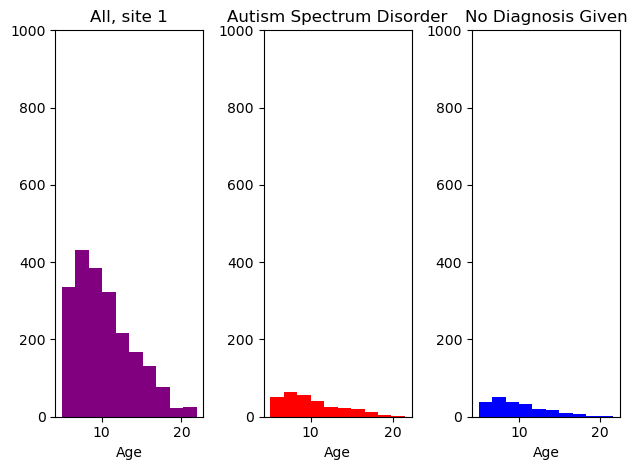

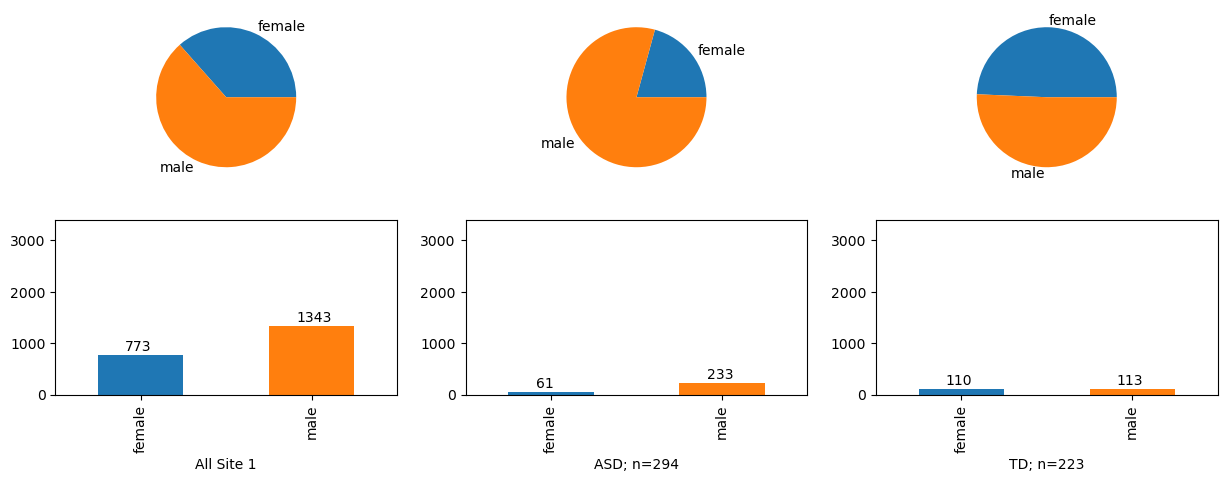

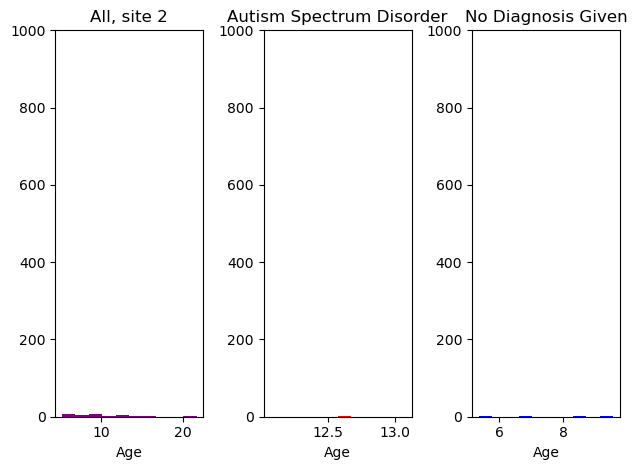

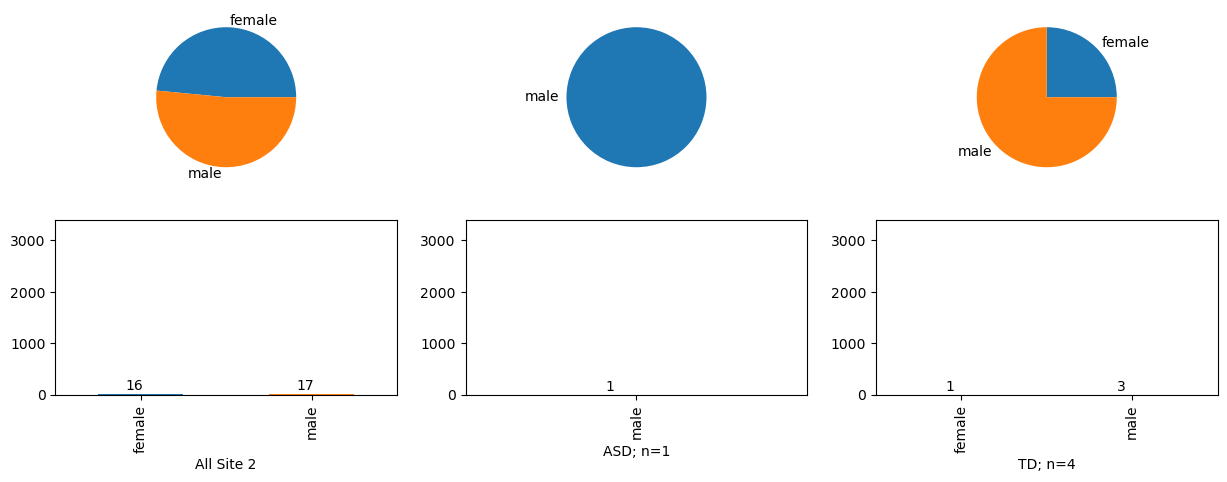

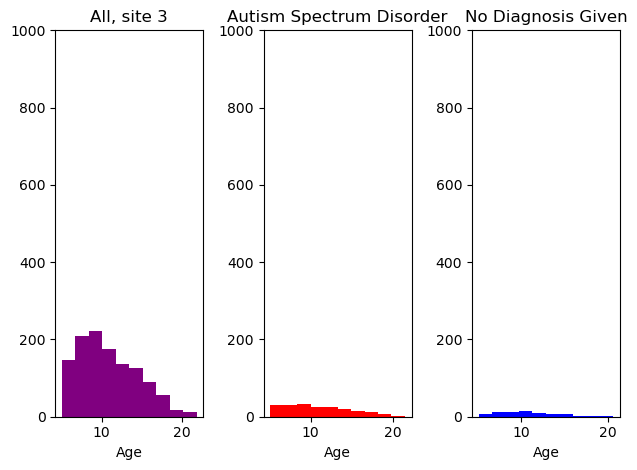

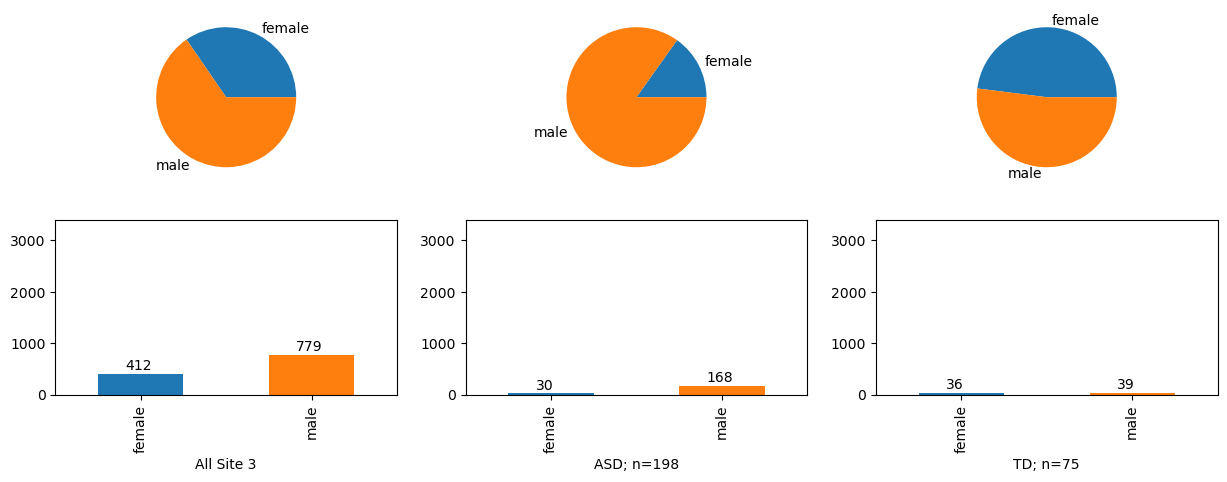

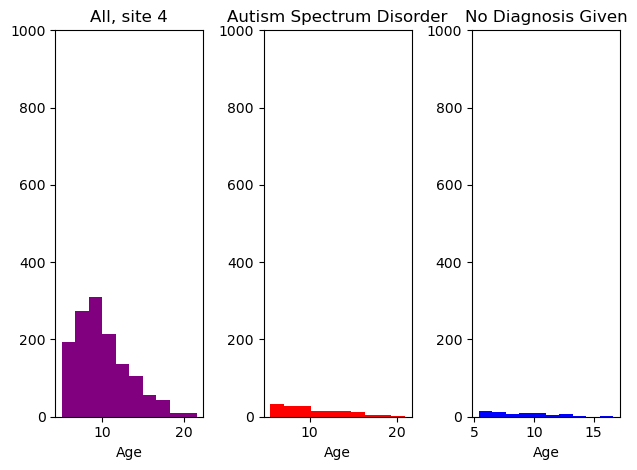

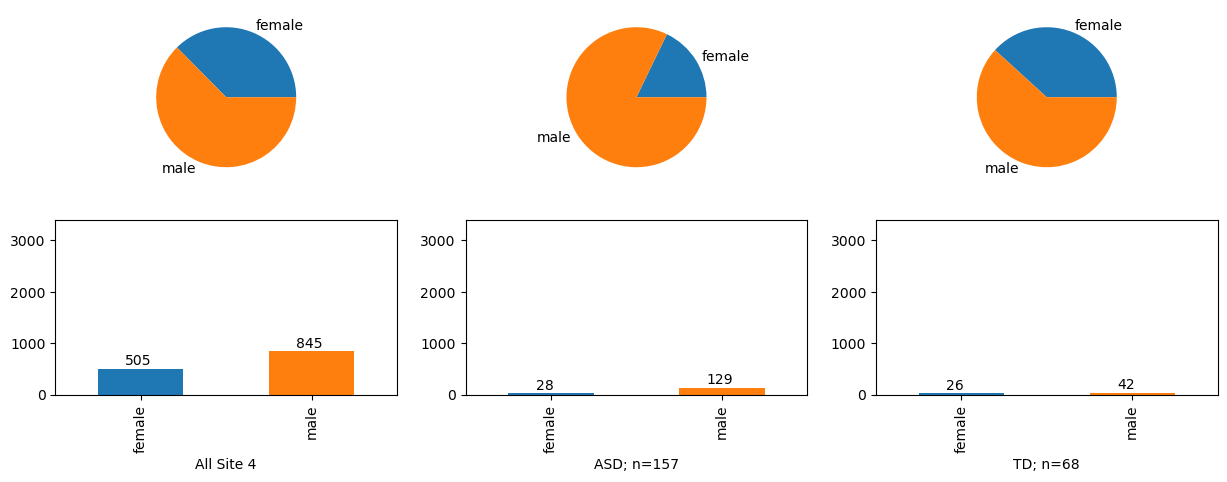

In [20]:
for site in np.arange(1,5):
    fig, axs = plt.subplots(1, 3)

    # plot the first subplot with age column for the entire dataframe
    #.plot(df['Age'])
    axs[0].hist(dx_final[(dx_final['Site'] == site)]['Age'], bins=10, color='purple')
    axs[0].set_title(f'All, site {site}')
    axs[0].set_ylim([0, 1000])
    axs[0].set_xlabel('Age')

    # plot the second subplot with age column for rows where Autism Spectrum Disorder is equal to 1
    axs[1].hist(dx_final[(dx_final['Autism Spectrum Disorder'] == 1) & (dx_final['Site'] == site)]['Age'], bins=10, color='red')
    axs[1].set_title('Autism Spectrum Disorder')
    axs[1].set_ylim([0, 1000])
    axs[1].set_xlabel('Age')

    # plot the third subplot with age column for rows where No Diagnosis Given is equal to 1
    axs[2].hist(dx_final[(dx_final['No Diagnosis Given'] == 1) & (dx_final['Site'] == site)]['Age'], bins=10, color='blue')
    axs[2].set_title('No Diagnosis Given')
    axs[2].set_ylim([0, 1000])
    axs[2].set_xlabel('Age')

    # adjust the layout of subplots
    plt.tight_layout()

    # show the plot
    plt.show()




    fig, axs = plt.subplots(2, 3, figsize=(15, 5))

    dx_final[dx_final['Site'] == site].groupby('Sex').size().plot(kind='pie', ax=axs[0,0])

    #dx_final.groupby('Sex').size().plot(kind='pie', ax=axs[0,0])
    dx_final[(dx_final['Site'] == site)].groupby('Sex').size().plot(kind='bar', ax=axs[1,0], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'All Site {site}')
    #dx_final.groupby('Sex').size().plot(kind='bar', ax=axs[1,0], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'All; n={dx_final.shape[0]}')
    for i in axs[1,0].patches:
        axs[1,0].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)

    dx_asd=dx_final[(dx_final['Autism Spectrum Disorder'] == 1) & (dx_final['Site'] == site)]
    dx_asd.groupby('Sex').size().plot(kind='pie', ax=axs[0,1])
    dx_asd.groupby('Sex').size().plot(kind='bar', ax=axs[1,1], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'ASD; n={dx_asd.shape[0]}')
    for i in axs[1,1].patches:
        axs[1,1].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)
    dx_td=dx_final[(dx_final['No Diagnosis Given'] == 1) & (dx_final['Site'] == site)]
    dx_td.groupby('Sex').size().plot(kind='pie', ax=axs[0,2])
    dx_td.groupby('Sex').size().plot(kind='bar', ax=axs[1,2], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'TD; n={dx_td.shape[0]}')
    for i in axs[1,2].patches:
        axs[1,2].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)

    plt.show()

## get SRS scores


/tmp/ipykernel_7758/1876133186.py:1: DtypeWarning: Columns (137,152) have mixed types. Specify dtype option on import or set low_memory=False.
  dx = pd.read_csv('/nese/mit/group/sig/projects/hbn/phenotype/Clinical_Measures/Clinical_Diagnosis_Demographics.csv')
